## 4.1 Использование генетического алгоритма

С помощью любой существующей библиотеки Python, реализующей генетические алгоритмы, получить решение задачи о рюкзаке для своего набора 
данных (определяется номером в списке).

Шергалис Донат, 3530903/70301 Вариант 31.

In [1]:
var = 31

population_size = 200

In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import random
from operator import itemgetter 
import json
from geneticalgorithm import geneticalgorithm as ga

In [3]:
def read_file(var = var):
    data_file = 'data/' + str(var) + '.txt'

    with open(data_file) as f:
        W, V = [int(x) for x in next(f).split()]

    data = pd.read_csv(data_file, 
                       skiprows=1,  
                       names=['w', 'v', 'c'], 
                       delim_whitespace=True)
    return data, W, V

In [4]:
data, W, V = read_file(var)
weights = len(data.index)

print(f'weights = {weights}') # количество весов
print(f'W = {W}') # грузоподъёмность
print(f'V = {V}') # вместимость

print('data: ')   # w = вес, v = объём, c = ценность
data.head()

weights = 30
W = 13000
V = 12
data: 


,w,v,c
0,897,0.6,167
1,138,0.6,293
2,1569,0.8,359
3,672,0.7,298
4,1514,0.4,265


In [5]:
def sum_col(solution, col):
    return round(sum(data[col][i] if s else 0 for i, s in enumerate(solution)), 5)

def sums(solution):
    return [sum_col(solution, col) for col in ['w', 'v', 'c']]

In [6]:
def fitness(solution):
    w, v, c = sums(solution)
    return -c if w <= W and v <= V else 0

In [7]:
model = ga(function = fitness,
             dimension = weights,
             variable_type = 'bool')
model.param

{'max_num_iteration': None,
 'population_size': 100,
 'mutation_probability': 0.1,
 'elit_ratio': 0.01,
 'crossover_probability': 0.5,
 'parents_portion': 0.3,
 'crossover_type': 'uniform',
 'max_iteration_without_improv': None}

 The best solution found:                                                                           
 [0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 1.]

 Objective function:
 -4640.0


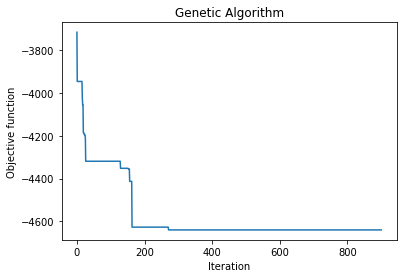

In [8]:
model.run()
solution = model.output_dict['variable']

In [9]:
indexes = [i for i, s in enumerate(solution) if s]

result = data.iloc[indexes,:]

print(f"W = {sum(result['w'])}, V = {sum(result['v'])}, C = {sum(result['c'])}")
result

W = 12670, V = 11.6, C = 4640


,w,v,c
1,138,0.6,293
2,1569,0.8,359
3,672,0.7,298
6,1215,0.7,278
7,1292,0.6,360
8,996,0.6,320
11,716,0.7,214
15,1534,0.9,377
16,1066,0.6,351
17,714,1.1,301
